In [1]:
# Declaring path variables to make Basemap work in jupyter hub. Make sure that the conda environment path matches yours
import os
os.environ['PATH'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/bin:' + os.environ['PATH']
os.environ['PROJ_LIB'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/share/proj'

# General Tool Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap
import biota
import biota.plot as bpl
import collections
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import math
import pickle 

import lasio



%matplotlib inline

In [2]:
ChapwellList =['FORAKER 1207 1SMH-11',
 'FORAKER 1207 2UMH-11',
 'FORAKER 1207 3WH-11',
 'FORAKER 1207 4LMH-11',
 'FORAKER 1207 5WH-11',
 'FORAKER 1207 6UMH-11',
 'FORAKER 1207 7SMH-11',
 'FORAKER 1207 8UMH-11',
 'FORAKER 1207 9LMH-11',
 'FORAKER 1207 10MUH-11',
 'FORAKER 1207 11SMH-11']

In [3]:
LoadChapwellList=['Foraker 1207 #1SMH-11',
 'Foraker 1207 #2UMH-11',
 'Foraker 1207 #3WH-11',
 'Foraker 1207 #4LMH-11',
 'Foraker 1207 #5WH-11',
 'Foraker 1207 #6UMH-11',
 'Foraker 1207 #7SMH-11',
 'Foraker 1207 #8UMH-11',
 'Foraker 1207 #9LMH-11',
 'Foraker 1207 #10MUH-11',
 'Foraker 1207 #11SMH-11']

In [19]:
currentDirectory = os.getcwd()
Chapdfs = {}
Chapwellnames = {}

#with open('./SavedData/Chapwellnames.pkl', 'wb') as f:
#    pickle.dump(wellnames, f)
#with open('./SavedData/Chapwellnames.pkl', 'rb') as f:
#    ChapwellList = pickle.load(f)
    
#Define welldf file names
for i,well in enumerate(LoadChapwellList):
    idx = i+1
    Chapwellnames[well] = idx
    
for well in LoadChapwellList:
    wellname = Chapwellnames[well]
    #filepath = "./SavedData08192019/{}.pkl".format(well) 
    filepath = "./JulyData/{}.pkl".format(well) 
    file = open(filepath,'rb')
    Chapdfs[wellname] = pickle.load(file)

In [8]:
#Assign Formations
formations = {}
#formation list
fmlist = ['SM','UM','WF','LM','WF','UM','SM','UM','LM','UM','SM']
#Assign formations
for i,formation in enumerate(fmlist):
    well = ChapwellList[i]
    formations[well] = formation

In [46]:
#Chapdfs[2].loc[0,'LEASE']

In [11]:
#Assign color palletes by formation
colormapfm = {'UM':'lightseagreen','LM':'darkslategray','SM':'green','WF':'darkgreen'}

In [61]:
colormapfm[formations['FORAKER 1207 1SMH-11']]

'green'

In [20]:
Chapdfs[1].columns

Index(['LEASE', 'PERIOD', 'TP', 'CP', 'BH', 'GROSS OIL', 'GROSS WTR',
       'GROSS GAS', 'GROSS BOE', 'Downtime', 'Lift', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Choke'],
      dtype='object')

In [25]:
foo = foo[['LEASE','CP','TP']]

In [22]:
filename = 'ChaparralProductionDataJuly.csv'
AllChap = pd.read_csv(filename)

In [56]:
#AllChap.groupby('Well')

In [26]:
#Chapdfs[1]

In [26]:
foo.head()

,LEASE,CP,TP
0,FORAKER 1207 2UMH-11,NaN,NaN
1,FORAKER 1207 2UMH-11,1101.0,0.0
2,FORAKER 1207 2UMH-11,1110.0,0.0
3,FORAKER 1207 2UMH-11,1040.0,0.0
4,FORAKER 1207 2UMH-11,960.0,0.0


In [10]:
for i,well in enumerate(Chapdfs):
    Chapdfs[well] = Chapdfs[well][['LEASE','PERIOD','TP','CP','BH','GROSS OIL','GROSS WTR','GROSS GAS',\
           'GROSS BOE','Downtime','Lift','Choke','Cum Prod','Days Online']]

In [11]:
for i,well in enumerate(Chapdfs):
    Chapdfs[well].rename(columns={'LEASE':'Well'}, inplace=True)

In [12]:
wellkeys = ['FORAKER 1207 1SMH-11',
 'FORAKER 1207 2UMH-11',
 'FORAKER 1207 3WH-11',
 'FORAKER 1207 4LMH-11',
 'FORAKER 1207 5WH-11',
 'FORAKER 1207 6UMH-11',
 'FORAKER 1207 7SMH-11',
 'FORAKER 1207 8UMH-11',
 'FORAKER 1207 9LMH-11',
 'FORAKER 1207 10UMH-11',
 'FORAKER 1207 11SMH-11']

In [13]:
fmlist = ['SM','UM','WF','LM','WF','UM','SM','UM','LM','UM','SM']

fmdict = dict(zip(wellkeys,fmlist))

In [14]:
complist = ['3Z','3Z','4Z','2ZL','2ZF','1Z','1Z','5Z','6Z','5Z','6Z']

compdict = dict(zip(wellkeys,complist))

In [15]:
padlist = ['Pad3','Pad3','Pad3','Pad2','Pad2','Pad2','Pad2','Pad1','Pad1','Pad1','Pad1']

paddict = dict(zip(wellkeys,padlist))

In [16]:
for i,well in enumerate(Chapdfs):
    Chapdfs[well]['Formation'] = Chapdfs[well]['Well'].map(fmdict)
    Chapdfs[well]['Pad'] = Chapdfs[well]['Well'].map(paddict)
    Chapdfs[well]['Comp Order'] = Chapdfs[well]['Well'].map(compdict)

In [117]:
#Chapdfs[10]

In [22]:
AllChapdfs = pd.concat(Chapdfs)

In [17]:
for i,well in enumerate(Chapdfs):
    Chapdfs[well].rename(columns={'LEASE':'Well'}, inplace=True)

In [36]:
mergedf = pd.concat([Chapdfs[1],Chapdfs[2]])

In [21]:
appended_data = []
for infile in glob.glob("*.xlsx"):
    data = pandas.read_excel(infile)
    # store DataFrame in list
    appended_data.append(data)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)
# write DataFrame to an excel sheet 
appended_data.to_excel('appended.xlsx')

NameError: name 'glob' is not defined

In [23]:
AllChapdfs.to_csv('ChaparralProductionDataJuly.csv')

In [15]:
Chapdfs[1]['LEASE'].head()

0    FORAKER 1207 1SMH-11
1    FORAKER 1207 1SMH-11
2    FORAKER 1207 1SMH-11
3    FORAKER 1207 1SMH-11
4    FORAKER 1207 1SMH-11
Name: LEASE, dtype: object

In [15]:
#Chapdfs[1].head()

In [17]:
#Chapdfs[3].head()

In [ ]:
# NO LONGER RELATED TO SPOTFIRE

In [38]:
file = 'ForakerUnitJulyProductionData.csv'
AllChap = pd.read_csv(file)

In [40]:
newdfs = {}
for well, welldf in AllChap.groupby('Well'):
    newdfs [well] = welldf

In [47]:
#newdfs['FORAKER 1207 1SMH-11']

In [78]:
ChapwellList

['FORAKER 1207 1SMH-11',
 'FORAKER 1207 2UMH-11',
 'FORAKER 1207 3WH-11',
 'FORAKER 1207 4LMH-11',
 'FORAKER 1207 5WH-11',
 'FORAKER 1207 6UMH-11',
 'FORAKER 1207 7SMH-11',
 'FORAKER 1207 8UMH-11',
 'FORAKER 1207 9LMH-11',
 'FORAKER 1207 10UMH-11',
 'FORAKER 1207 11SMH-11']

In [77]:
ChapwellList[10] = 'FORAKER 1207 11SMH-11'

In [70]:
newdfs['FORAKER 1207 8UMH-11'].head()

,Well,PERIOD,TP,CP,BH,GROSS OIL,GROSS WTR,GROSS GAS,GROSS BOE,Downtime,Lift,Choke,Cum Prod,Days Online,Formation,Pad,Comp Order
834,FORAKER 1207 8UMH-11,4/5/2019,NaN,NaN,NaN,424.68,0.0,0.0,424.6800,0.0,FLOW,22.000000,424.68,1.0,UM,Pad1,5Z
835,FORAKER 1207 8UMH-11,4/6/2019,0.0,1629.0,NaN,951.55,402.0,465.0,1029.0500,0.0,FLOW,26.666667,1376.23,2.0,UM,Pad1,5Z
836,FORAKER 1207 8UMH-11,4/7/2019,0.0,1398.0,NaN,1220.15,1035.0,1519.0,1473.3167,0.0,FLOW,29.416667,2596.38,3.0,UM,Pad1,5Z
837,FORAKER 1207 8UMH-11,4/8/2019,0.0,1269.0,NaN,1447.05,1234.0,1830.0,1752.0500,0.0,FLOW,31.083333,4043.43,4.0,UM,Pad1,5Z
838,FORAKER 1207 8UMH-11,4/9/2019,0.0,1178.0,NaN,1367.30,1220.0,1993.0,1699.4667,0.0,FLOW,32.000000,5410.73,5.0,UM,Pad1,5Z


In [54]:
#for name in newdfs:
#    print(name['Well'])

In [27]:
Chapwells = AllChap.groupby('Well')

In [55]:
#Chapwells['Well'].head()

In [79]:
Chapdfs = {}
for i, well in enumerate(newdfs):
    wellname = ChapwellList[i]
    idx = i+1
    Chapdfs [idx] = newdfs[wellname]
    print(idx)

1
2
3
4
5
6
7
8
9
10
11


In [90]:
Chapdfs[11].head()

,Well,PERIOD,TP,CP,BH,GROSS OIL,GROSS WTR,GROSS GAS,GROSS BOE,Downtime,Lift,Choke,Cum Prod,Days Online,Formation,Pad,Comp Order
1178,FORAKER 1207 11SMH-11,4/5/2019,0.0,1268.0,NaN,366.92,664.0,172.0,395.5867,0.0,FLOW,28.25,366.92,1.0,SM,Pad1,6Z
1179,FORAKER 1207 11SMH-11,4/6/2019,0.0,1328.0,NaN,718.20,2176.0,1108.0,902.8667,0.0,FLOW,32.75,1085.12,2.0,SM,Pad1,6Z
1180,FORAKER 1207 11SMH-11,4/7/2019,0.0,1247.0,NaN,412.89,2525.0,1678.0,692.5567,0.0,FLOW,34.00,1498.01,3.0,SM,Pad1,6Z
1181,FORAKER 1207 11SMH-11,4/8/2019,0.0,1247.0,NaN,631.48,3212.0,1576.0,894.1467,0.0,FLOW,34.00,2129.49,4.0,SM,Pad1,6Z
1182,FORAKER 1207 11SMH-11,4/9/2019,0.0,1219.0,NaN,755.55,2116.0,1890.0,1070.5500,0.0,FLOW,35.75,2885.04,5.0,SM,Pad1,6Z


In [114]:
Chapdfs[11].iloc[0,0]

'FORAKER 1207 11SMH-11'

In [116]:
for well in Chapdfs:
    wellname = Chapdfs[well].iloc[0,0]
    Chapdfs[well].to_pickle("./PlotPickles/{}.pkl".format(wellname))

In [94]:
#Sample Wells
Comparewells = [Chapdfs[11],Chapdfs[9],Chapdfs[7],Chapdfs[4]]

In [110]:
Comparewells[1].iloc[0,0]

'FORAKER 1207 9LMH-11'

KeyError: 'the label [0] is not in the [index]'

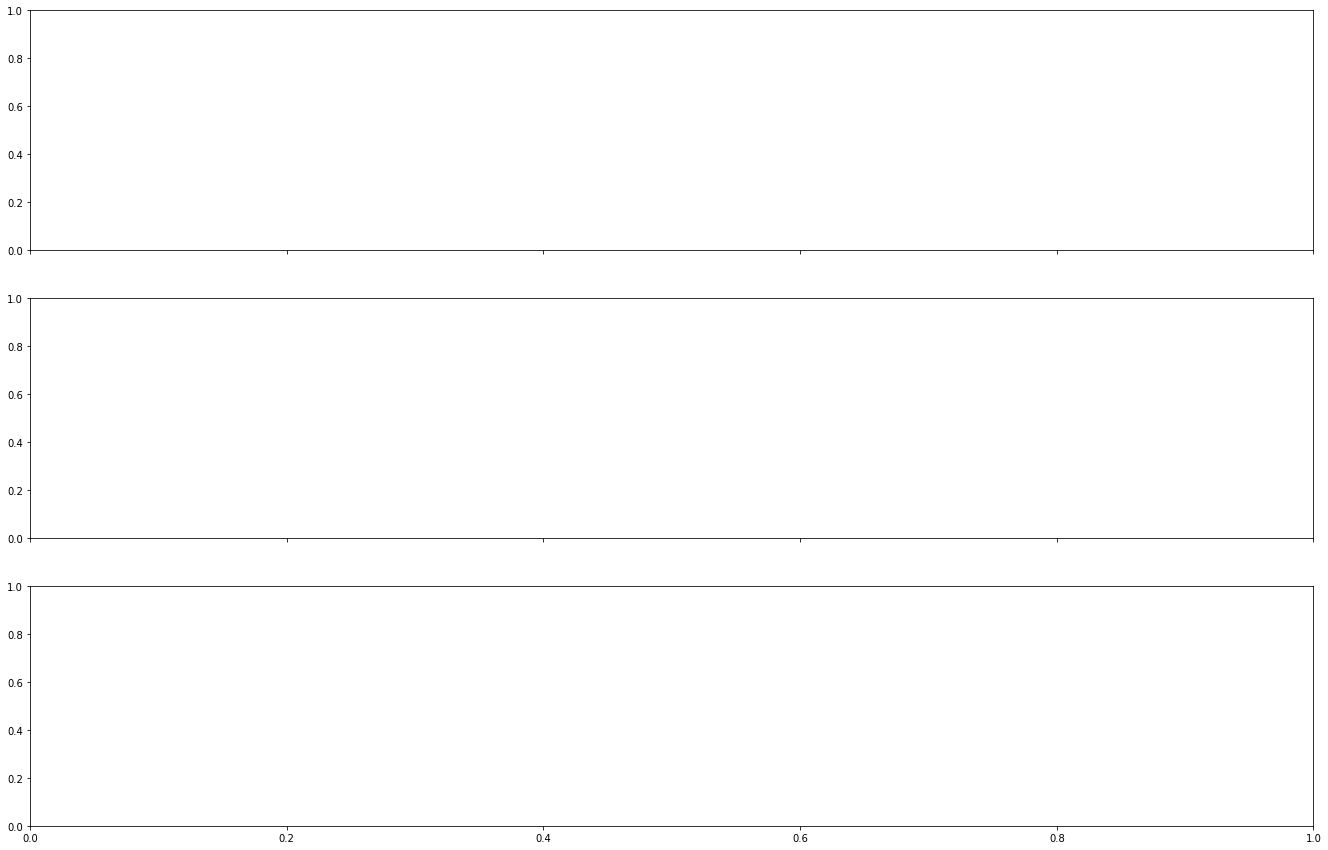

In [95]:
#import relevant datetime and plotting modules
import matplotlib
import pylab
NUM_COLORS = 5
cm = pylab.get_cmap('tab10')
#cm = pylab.get_cmap('tab20')

#Plot Production Data
fig, axs = plt.subplots(3, sharex = True, figsize=(23,15))
#ax2 = ax.twinx()
for i,well in enumerate(Comparewells):
    wellname = Comparewells[i].loc[0,'Well']
    wellcolor = colormapfm[formations[wellname]]
    #wellcolor = cm(1.*i/NUM_COLORS)
    axs[0].plot(Comparewells[i]['Days Online'], Comparewells[i]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
            #linewidth=0, \
            c=wellcolor, label = wellname + ' '+ 'Oil Rate')
    axs[1].plot(Comparewells[i]['Days Online'], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                   marker='+', linestyle = '--', c=wellcolor ,label=wellname + ' '+'Water Cut')
    
    axs[2].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR']),\
                                            marker='^', markersize = 6, alpha = 1, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')
    #axs[i].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
    #axs[i].tick_params(axis="both", labelsize=16)
    #wellcolor = cm(1.*i/NUM_COLORS)
    #ax.plot(newdfs[well]['DaysOn'], newdfs[well]['Oil Rate'],marker='o', markersize = 5, alpha = 1, \
    #        linewidth=0, c=wellcolor, label = wellnames[i] + ' '+ 'Oil Rate')
    
#Add legends
#fig.legend(bbox_to_anchor=(0.25, 0.28, 0.55, 0.52),markerscale=3, fontsize = 16)
#ax.set_ylabel('Oil Rate [STB/D]',fontsize = 16)
axs[0].set_ylabel('Oil Rate [STB/D]',fontsize = 16)
axs[0].set_ylim(bottom=0)
axs[0].set_xlim([0,100])
axs[2].set_xlabel('Days Online', fontsize = 16)
#ax.yaxis.set_label_coords(-0.03,0.5)
axs[1].set_ylabel('Watercut [%]',fontsize = 16)
axs[2].set_ylabel('Liquid Rate [STB/D]',fontsize = 16)
#ax.set_ylim(top=8000)
#ax.set_ylim(top=4500)

axs[1].set_ylim([0,100])

for idx in range(3):
    axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
#axs.tick_params(axis="both", labelsize=16)
#axs[0].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
#Save Image
#imageloc = folderloc +'/' + 'Silvertip Oil Rate'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
#fig.savefig(imageloc, dpi=200, bbox_inches='tight')
        

In [23]:
ChapwellList[8]

'Foraker 1207 #9LMH-11'

In [21]:
#Define Pads with Wells
Pad1 = [Chapdfs[8],Chapdfs[9],Chapdfs[10],Chapdfs[11]]
Pad2 = [Chapdfs[6],Chapdfs[4],Chapdfs[7],Chapdfs[5]]
Pad3 = [Chapdfs[1],Chapdfs[2],Chapdfs[3]]
Padlist = [Pad1,Pad2,Pad3]
Padnames = ['Pad1','Pad2','Pad3']

In [90]:
#name(Padlist)

In [91]:
#Padlist[1][3].columns

In [ ]:
#Select Plotting Feature
#Oil Rate

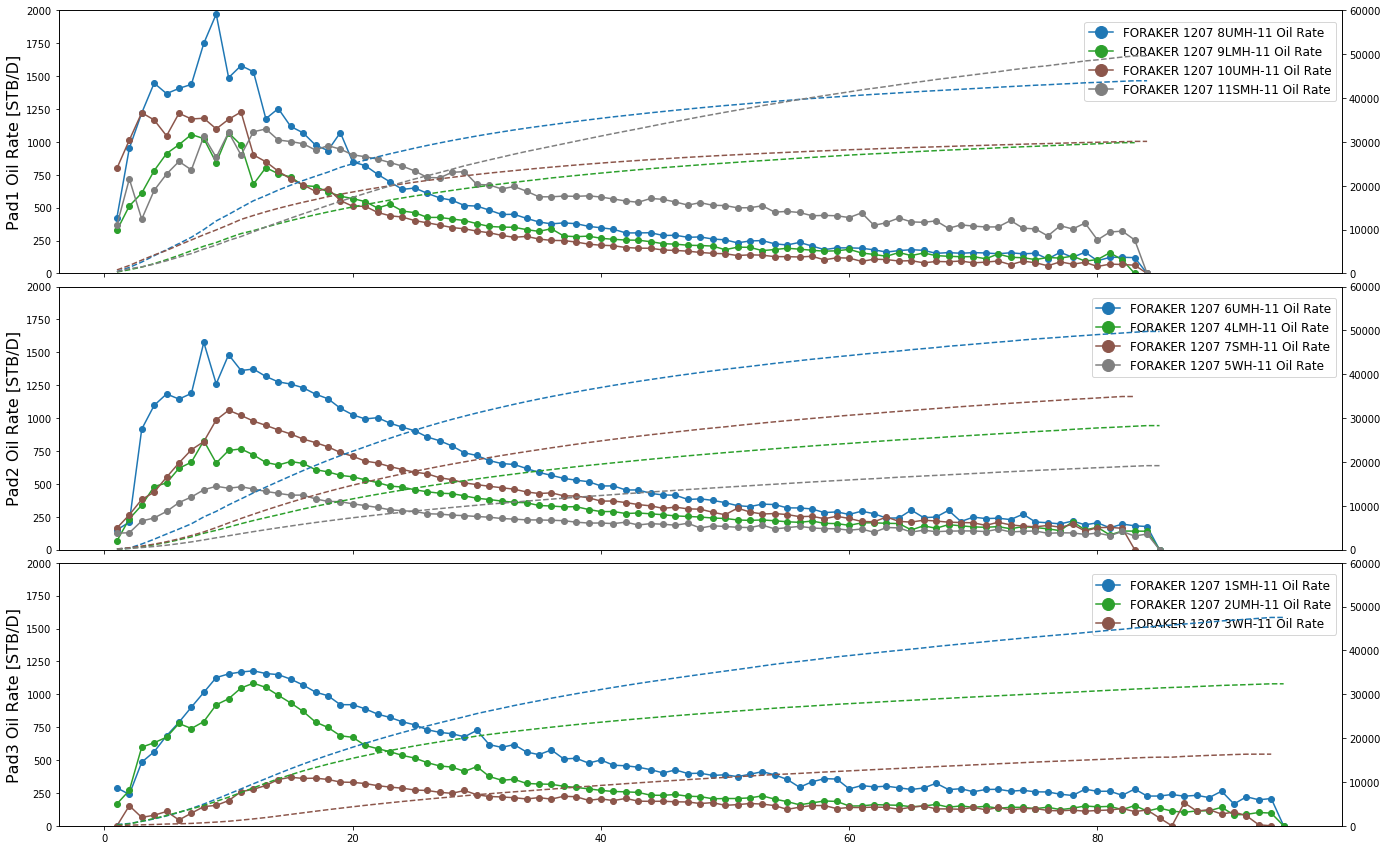

In [22]:
import matplotlib
import pylab
#Plot Production Data
fig, axs = plt.subplots(3, sharex = True,figsize=(23,15))
plt.subplots_adjust(hspace=0.05)
NUM_COLORS = 4
cm = pylab.get_cmap('tab10')
timeseries = 'Days Online'
#timeseries = 'PERIOD'

for i,pad in enumerate(Padlist):
    ax = axs[i]
    ax2 = ax.twinx()
    Padname = Padnames[i]
    for i,well in enumerate(pad):
        wellname = pad[i].loc[0,'LEASE']
        wellcolor = cm(1.*i/NUM_COLORS)
        ax.plot(pad[i][timeseries], pad[i]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
                c=wellcolor, label = wellname + ' Oil Rate')
        ax.set_ylabel(Padname+ ' Oil Rate [STB/D]',fontsize = 16)
        ax.set_ylim(top = 2000,bottom=0)
        ax.legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.70),markerscale=2, fontsize = 12)
        
        ax2.plot(pad[i][timeseries], pad[i]['Cum Prod']\
        #ax2.plot(pad[i]['Days Online'], (100*pad[i]['GROSS WTR'] / (pad[i]['GROSS OIL'] + pad[i]['GROSS WTR']))\
        ,linestyle = '--',\
        c=wellcolor, label = wellname + ' WCT')
        ax2.set_ylim(top = 60000,bottom=0)

In [129]:
#Define Groups of  Wells
Group1 = [Chapdfs[10],Chapdfs[8]]
Group2 = [Chapdfs[6]]
Group3 = [Chapdfs[2]]
Grouplist = [Group1,Group2,Group3]          
#Group3 = [Chapdfs[1]]
#Grouplist = [Group1,Group2,Group3]

#Group Colors
#groupcolor = ['lightseagreen','darkslategray','R']
groupcolor = ['lightseagreen','darkslategray','royalblue']

#Sample Wells
#Comparewells = Group1+Group2+Group3
Comparewells = Group1+Group2+Group3

#Assign wellmarkers
keys=[]
markers= ['o','^','v','D','x']
#markers= ['o','^','v','D','x','P']
for i,well in enumerate (Comparewells):
    keys.append(Comparewells[i].loc[0,'LEASE'])
    
markerdictionary = dict(zip(keys,markers))

In [130]:
#markerdictionary

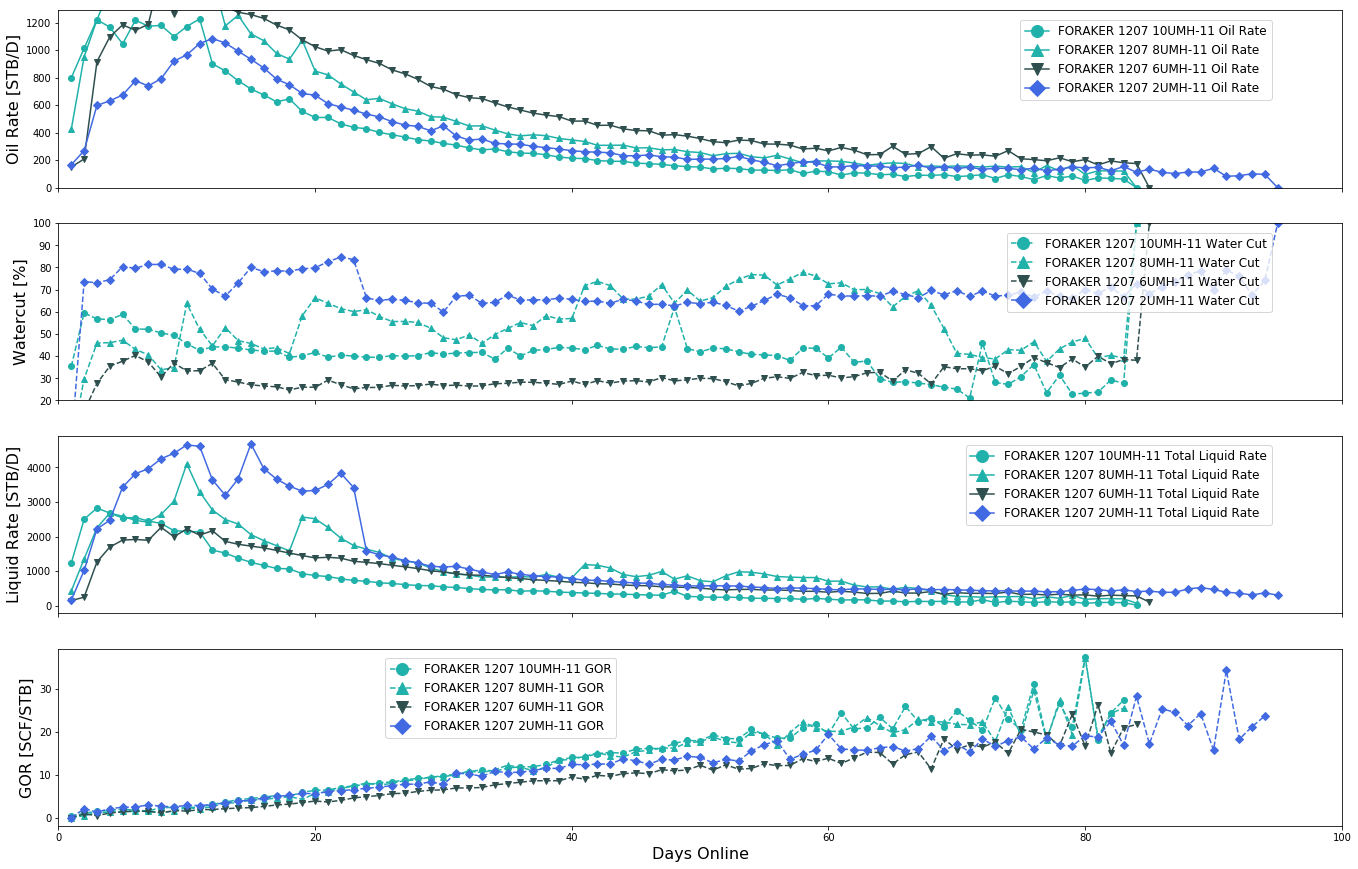

In [131]:
#import relevant datetime and plotting modules
numsubplots = 4
fig, axs = plt.subplots(numsubplots, sharex = True, figsize=(23,15))

for i,group in enumerate(Grouplist):
    #Padname = Padnames[i]
    Comparewells = Grouplist[i]
    wellcolor = groupcolor[i]
    #marker = 
    #Plot Production Data
    for i,well in enumerate(Comparewells):
        
        wellname = Comparewells[i].loc[0,'LEASE']
        wellmarker = markerdictionary[wellname]
        #wellcolor = colormapfm[formations[wellname]]
        #wellcolor = cm(1.*i/NUM_COLORS)
        axs[0].plot(Comparewells[i]['Days Online'], Comparewells[i]['GROSS OIL'],marker=wellmarker, markersize = 6, alpha = 1, \
                #linewidth=0, \
                c=wellcolor, label = wellname + ' '+ 'Oil Rate')
        axs[1].plot(Comparewells[i]['Days Online'], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                       marker=wellmarker, linestyle = '--', c=wellcolor ,label=wellname + ' '+'Water Cut')

        axs[2].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR']),\
                                                marker=wellmarker, markersize = 6, alpha = 1, \
                c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')
        
        axs[3].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS GAS']/Comparewells[i]['GROSS OIL']),\
                                                marker=wellmarker,linestyle='--', markersize = 6, alpha = 1, \
                c=wellcolor, label = wellname + ' '+ 'GOR')        


        #Add legends
        axs[0].set_ylabel('Oil Rate [STB/D]',fontsize = 16)
        axs[0].set_ylim(bottom=0)
        axs[0].set_xlim([0,100])
        #ax.yaxis.set_label_coords(-0.03,0.5)
        axs[1].set_ylabel('Watercut [%]',fontsize = 16)
        axs[1].set_ylim([20,100])
        #axs[2].set_xlabel('Days Online', fontsize = 16)
        axs[2].set_ylabel('Liquid Rate [STB/D]',fontsize = 16)
        axs[3].set_xlabel('Days Online', fontsize = 16)
        axs[3].set_ylabel('GOR [SCF/STB]',fontsize = 16)

    for idx in range(numsubplots):
        axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
        #axs.tick_params(axis="both", labelsize=16)
        #axs[0].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
        
#Save Image
#imageloc = folderloc +'/' + 'Silvertip Oil Rate'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
#fig.savefig(imageloc, dpi=200, bbox_inches='tight')


In [132]:
folderloc = currentDirectory + '/Images/Chaparral'
    
try:  
     os.makedirs(folderloc)
except OSError:  
     print ("Creation of the directory %s failed" % folderloc)
else:  
        print ("Successfully created the directory %s" % folderloc)

        #Save Image
#currentDirectory
imageloc = folderloc +'/' + 'Upper Meramec by Pad'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
fig.savefig(imageloc, dpi=200, bbox_inches='tight')

Creation of the directory /home/jovyan/Practice/Images/Chaparral failed


In [ ]:
        #imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
        #fig.savefig(imageloc, dpi=200, bbox_inches='tight')

In [40]:
        #cm = pylab.get_cmap('tab20')
        #ax2 = ax.twinx()
        for i,well in enumerate(Comparewells):

        wellcolor = cm(1.*i/NUM_COLORS)
        axs[0].plot(Comparewells[i]['Days Online'], Comparewells[i]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
                #linewidth=0, \
                c=wellcolor, label = Compname[i] + ' '+ 'Oil Rate')
        axs[1].plot(Comparewells[i]['Days Online'], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                       marker='+', linestyle = '--', c=wellcolor ,label=Compname[i] + ' '+'Water Cut')

        axs[2].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR']),\
                                                marker='^', markersize = 6, alpha = 1, \
                c=wellcolor, label = Compname[i] + ' '+ 'Total Liquid Rate')
        #axs[i].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
        #axs[i].tick_params(axis="both", labelsize=16)
        #wellcolor = cm(1.*i/NUM_COLORS)
        #ax.plot(newdfs[well]['DaysOn'], newdfs[well]['Oil Rate'],marker='o', markersize = 5, alpha = 1, \
        #        linewidth=0, c=wellcolor, label = wellnames[i] + ' '+ 'Oil Rate')

        #Add legends
        #fig.legend(bbox_to_anchor=(0.25, 0.28, 0.55, 0.52),markerscale=3, fontsize = 16)
        #ax.set_ylabel('Oil Rate [STB/D]',fontsize = 16)
        axs[0].set_ylabel('Oil Rate [STB/D]',fontsize = 16)
        axs[0].set_ylim(bottom=0)
        axs[0].set_xlim([0,100])
        axs[2].set_xlabel('Days Online', fontsize = 16)
        #ax.yaxis.set_label_coords(-0.03,0.5)
        axs[1].set_ylabel('Watercut [%]',fontsize = 16)
        axs[2].set_ylabel('Liquid Rate [STB/D]',fontsize = 16)
        #ax.set_ylim(top=8000)
        #ax.set_ylim(top=4500)

        axs[1].set_ylim([0,100])

        for idx in range(3):
        axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
        #axs.tick_params(axis="both", labelsize=16)
        #axs[0].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
        #Save Image
        #imageloc = folderloc +'/' + 'Silvertip Oil Rate'+'.png'
        #imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
        #imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
        #fig.savefig(imageloc, dpi=200, bbox_inches='tight')

            print(i)

0
1
0
1
0
1
